In [1]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats,lngs)

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations. 
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

22.80976133829462 -161.2092598113736
86.60124091063224 154.3619039475342
1.259638978593756 78.11009501451304
56.66521700029736 -161.23561448578255
-46.243079281783885 -139.35458972409265
-63.937162634429384 -15.494204811500452
20.348514292680335 -23.95387164407194
33.46572082638899 -143.13400871492274
47.27744154577772 -122.15868147046018
23.507424542451332 -120.75388398231127
0.3281308865172008 -7.8735693742494846
-32.21499523922031 -81.1271974551172
13.963498456660176 -112.4126415796968
31.157244901020007 -6.408356860230583
12.767419590338562 -91.38528663221496
10.965170131772538 -58.16696904149545
84.36252565310215 155.70268615769533
72.76647522240708 -26.79538338599704
6.636508159859019 -18.547637793141632
49.080690898355385 -76.6418810597985
-36.76190080484973 -16.30828346403777
4.049897765570407 98.81126803784696
42.310551981930956 -149.92264874701243
-77.97091996688444 66.02248471996643
-56.09793071637281 -109.86667527726595
-20.9236690342302 -88.08072964546007
39.23255680574343

81.2767525270377 -103.45244366766336
-42.96882504680449 -95.86341803642335
27.51870765635698 -35.384290090886225
-49.62197245849749 -115.90617560416014
-26.46412225782749 13.07564578806975
-77.33421727598022 94.97927363609108
6.968841732122414 81.60373030440752
-27.976085201963365 -164.88710298807737
-41.908894624947074 -87.82153233284296
56.38340203947311 56.75242539739443
-25.71500101382405 -61.594989085126485
19.466913444742588 26.153980412892736
-49.00113195068799 21.863880002613257
17.251061823120963 -117.87669561882088
-47.84430279610714 -144.21699863579568
74.24696995051713 -134.52810467239786
62.23807349632156 138.40488133137217
17.483514066628658 144.78500265632442
-19.713328992577672 -162.74243475708258
84.0043708909665 -45.008916729838006
12.202553760385427 23.236648965987484
-4.269008457449331 -5.190127206654012
35.02102936673701 153.54687745609203
-30.88752123137111 -128.9322060963177
-31.829975123591417 -25.506447159574122
16.563066631105613 141.30328436583267
-44.2823867

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count. 
len(cities)

636

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for the Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | viligili
City not found. Skipping...
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | auburn
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | harper
Processing Record 12 of Set 1 | talcahuano
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | marrakesh
Processing Record 15 of Set 1 | san jose
Processing Record 16 of Set 1 | oistins
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | senneterre
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | belawan
Processing Recor

Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | denpasar
Processing Record 38 of Set 4 | coronado
Processing Record 39 of Set 4 | iranshahr
Processing Record 40 of Set 4 | santa maria do para
Processing Record 41 of Set 4 | matara
Processing Record 42 of Set 4 | arinos
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | mawlaik
Processing Record 46 of Set 4 | nove hrady
Processing Record 47 of Set 4 | camacha
Processing Record 48 of Set 4 | warri
Processing Record 49 of Set 4 | sakakah
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | sorvag
City not found. Skipping...
Processing Record 2 of Set 5 | kalemie
Processing Record 3 of Set 5 | wanaka
Processing Record 4 of Set 5 | pathein
Processing Record 5 of Set 5 | khorixas
Processing Record 6 of Set 5 | terenos
Processing Record 7 of Set 5 | mangrol
Processing Record 8 of Set 5 | cairns
Processing Record 9 of Set 5 | semey
Proce

Processing Record 25 of Set 8 | kloulklubed
Processing Record 26 of Set 8 | portland
Processing Record 27 of Set 8 | wanning
Processing Record 28 of Set 8 | myitkyina
Processing Record 29 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 30 of Set 8 | pineville
Processing Record 31 of Set 8 | qianan
Processing Record 32 of Set 8 | dulag
Processing Record 33 of Set 8 | ahuimanu
Processing Record 34 of Set 8 | newark
Processing Record 35 of Set 8 | gboko
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | svetlogorsk
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | shenjiamen
Processing Record 40 of Set 8 | bafata
Processing Record 41 of Set 8 | eskisehir
Processing Record 42 of Set 8 | kemise
Processing Record 43 of Set 8 | tyukalinsk
Processing Record 44 of Set 8 | abha
Processing Record 45 of Set 8 | sangar
Processing Record 46 of Set 8 | klyuchi
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | be

Processing Record 12 of Set 12 | yenagoa
Processing Record 13 of Set 12 | vostok
Processing Record 14 of Set 12 | marsh harbour
Processing Record 15 of Set 12 | cabanas
Processing Record 16 of Set 12 | khasan
Processing Record 17 of Set 12 | batticaloa
Processing Record 18 of Set 12 | takoradi
Processing Record 19 of Set 12 | verkh-usugli
Processing Record 20 of Set 12 | lagoa
Processing Record 21 of Set 12 | burgeo
Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | surt
Processing Record 24 of Set 12 | koslan
Processing Record 25 of Set 12 | tazovskiy
Processing Record 26 of Set 12 | yining
Processing Record 27 of Set 12 | garoua boulai
Processing Record 28 of Set 12 | ternate
Processing Record 29 of Set 12 | dali
Processing Record 30 of Set 12 | shitanjing
Processing Record 31 of Set 12 | ahipara
Processing Record 32 of Set 12 | leshukonskoye
Processing Record 33 of Set 12 | woodstock
Processing Record 34 of Set 12 | portree
Processing Record 35 of Set 12 | yar-

In [11]:
len(city_data)

584

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,79.12,89,40,8.05,US,2022-07-29 17:45:05
1,Chokurdakh,70.6333,147.9167,49.87,92,100,9.80,RU,2022-07-29 17:46:21
2,Bethel,41.3712,-73.4140,88.34,57,20,9.22,US,2022-07-29 17:46:22
3,Rikitea,-23.1203,-134.9692,72.73,74,5,17.96,PF,2022-07-29 17:46:22
4,Cape Town,-33.9258,18.4232,56.26,76,75,3.00,ZA,2022-07-29 17:44:14


In [14]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-07-29 17:45:05,22.0752,-159.3190,79.12,89,40,8.05
1,Chokurdakh,RU,2022-07-29 17:46:21,70.6333,147.9167,49.87,92,100,9.80
2,Bethel,US,2022-07-29 17:46:22,41.3712,-73.4140,88.34,57,20,9.22
3,Rikitea,PF,2022-07-29 17:46:22,-23.1203,-134.9692,72.73,74,5,17.96
4,Cape Town,ZA,2022-07-29 17:44:14,-33.9258,18.4232,56.26,76,75,3.00


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Creating a scatter plot. Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


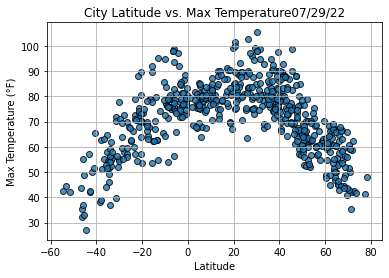

In [19]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

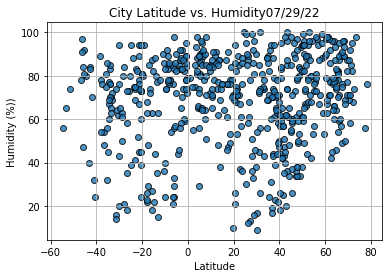

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

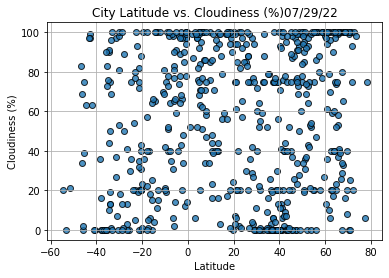

In [22]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

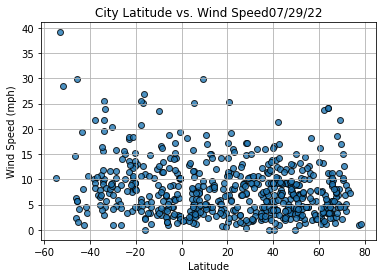

In [23]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress.
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and 
# the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y. values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    
    # Annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     San Jose
Country                        US
Date          2022-07-29 17:43:38
Lat                       37.3394
Lng                      -121.895
Max Temp                    77.09
Humidity                       70
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [26]:
# Create Northern and Souther Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

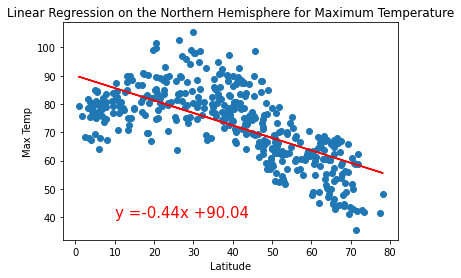

In [57]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                      'Max Temp', (10,40))

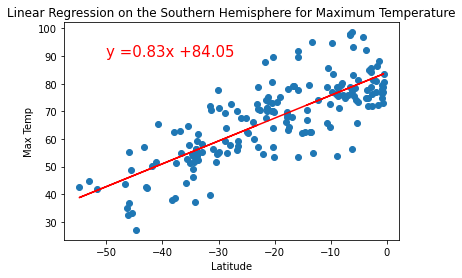

In [58]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                      'Max Temp', (-50,90))

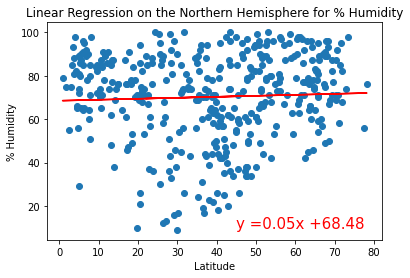

In [59]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity', (45,10))

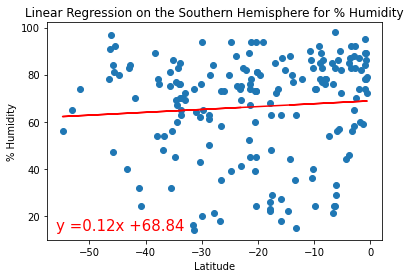

In [60]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity',
                      '% Humidity', (-56,14))

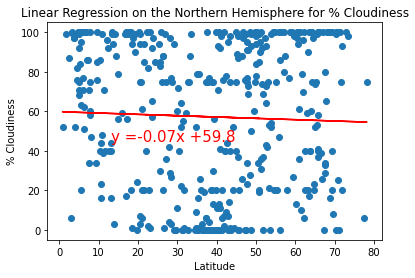

In [61]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                      '% Cloudiness', (13,45))

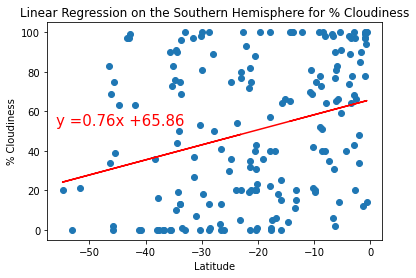

In [62]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                      '% Cloudiness', (-56,53))

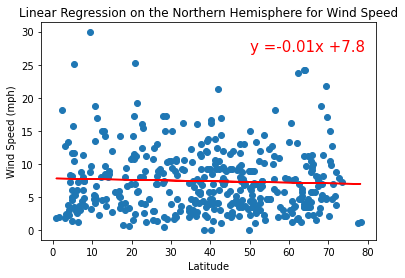

In [63]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 
                      'Wind Speed (mph)', (50,27))

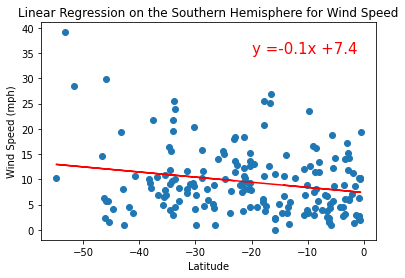

In [64]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed (mph)', (-20,35))